# importing libraries....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import evaluation
from sklearn.cluster import KMeans
sns.set()

everything is checked.. system okay


# data_analysis.....

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# dataprepocessing and analysis

In [3]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

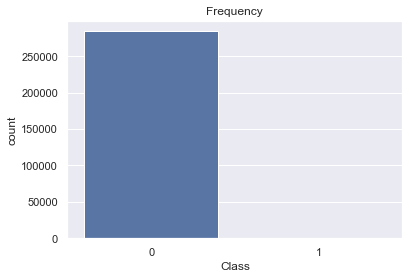

In [5]:
sns.countplot(x = "Class", data = data)
plt.title("Frequency")
plt.show()

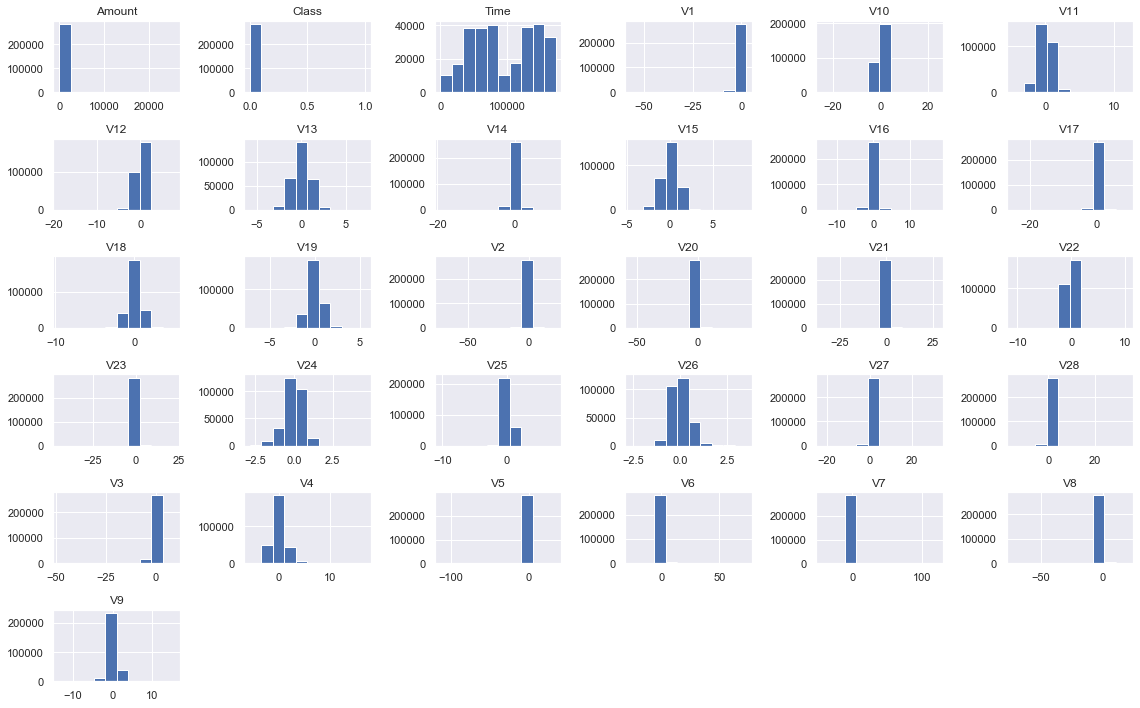

In [6]:
data.hist(figsize=(16,10))
plt.tight_layout()
plt.show()

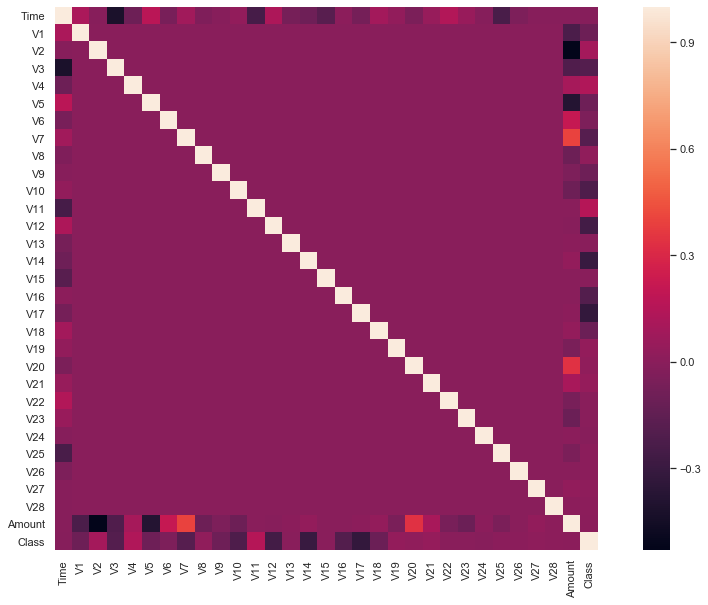

In [7]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),square=True)
plt.show()

# data preperation for training

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['Class']),data['Class'],test_size=0.2)

# Training Kmeans model

In [9]:
n_clusters = len(np.unique(y_train))
kmeans=KMeans(n_clusters=n_clusters)
kmeans.fit(x_train,y_train)

    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
predict=kmeans.fit_predict(x_test)

Accuracy Score 46.53 %
Classification report
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     56868
           1       0.00      0.66      0.00        94

    accuracy                           0.47     56962
   macro avg       0.50      0.56      0.32     56962
weighted avg       1.00      0.47      0.63     56962

Confusion Matrix


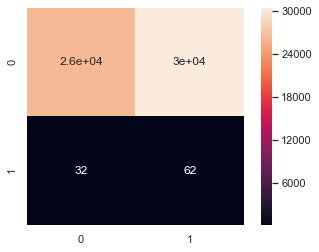

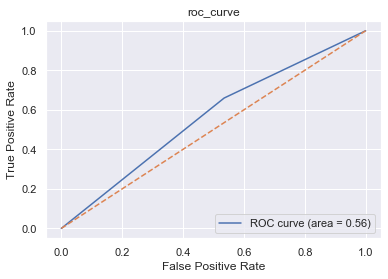

In [11]:
evaluation(y_test, predict)

# Supervised learning
## LocalOutlierFactor

In [12]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['Class']),data['Class'],test_size=0.2)

In [13]:
clf=LocalOutlierFactor(n_neighbors=20)
clf.fit(x_train,y_train)
predict1=clf.fit_predict(x_test)

In [14]:
set(predict1)

{-1, 1}

In [15]:
predict1[predict1==-1]=1
predict1[predict1==1]=0

Accuracy Score 99.79 %
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       0.00      0.00      0.00       119

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix
C:\Program Files\Python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


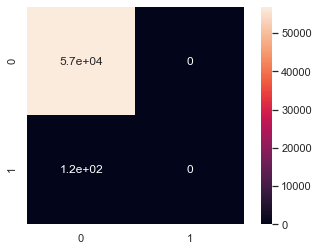

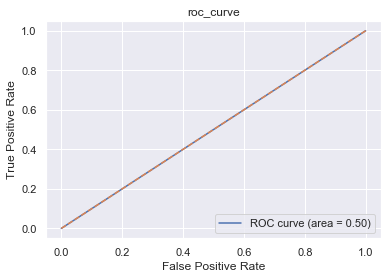

In [16]:
evaluation(y_test, predict1)

## random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
predict2=clf.predict(x_test)

Accuracy Score 99.94 %
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       0.95      0.76      0.85       119

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix


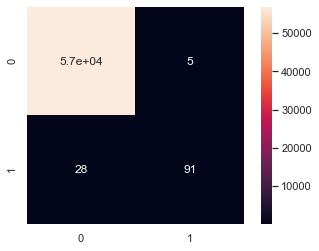

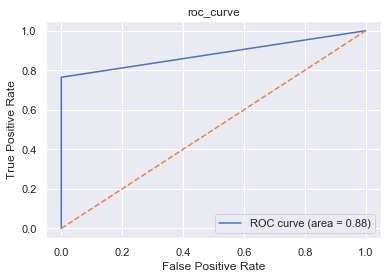

In [18]:
evaluation(y_test, predict2)

## decision tree classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict3=clf.predict(x_test)

Accuracy Score 99.91 %
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       0.79      0.80      0.79       119

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix


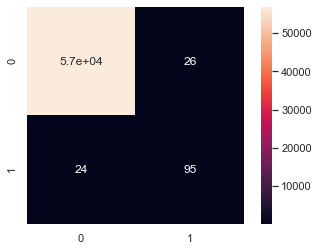

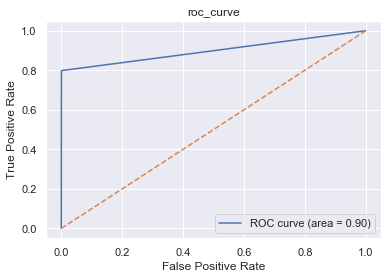

In [20]:
evaluation(y_test, predict3)

## knearest neighbors_algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier()
clf2.fit(x_train, y_train)
predict4=clf2.predict(x_test)

Accuracy Score 99.81 %
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56843
           1       1.00      0.07      0.13       119

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix


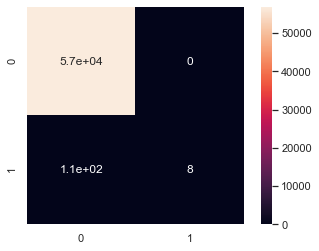

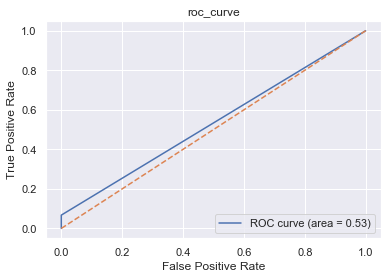

In [22]:
evaluation(y_test, predict4)